# <Font color = 'pickle'>**Load Libraries/Install Software**

In [ ]:
if 'google.colab' in str(get_ipython()):
  !pip install -Uqq fastai nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.3 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *

# <Font color = 'pickle'>**Specify Project Folders**

In [ ]:
# mount google drive
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This is the path where we will downlaod and save data
if 'google.colab' in str(get_ipython()):
  base = Path('/content/drive/MyDrive/data')
  data_path = Path('/content/')
else:
  base = Path('/home/harpreet/Insync/google_drive_shaannoor/data')
  data_path = Path('/home/harpreet/data')

In [ ]:
data_folder = data_path/'datasets/fastai-2023'
archive_folder = data_path/'archive/fastai-2023'
model_folder = base/'models/dl_fall_2023/cifar10'

In [ ]:
model_folder.mkdir(exist_ok=True, parents=True)
data_folder.mkdir(exist_ok=True, parents=True)
archive_folder.mkdir(exist_ok=True, parents=True)

# <Font color = 'pickle'>**Download Data**

In [ ]:
URLs.CIFAR

'https://s3.amazonaws.com/fast-ai-sample/cifar10.tgz'

In [ ]:
path = untar_data(URLs.CIFAR, archive = archive_folder, data =data_folder)

In [ ]:
path

Path('/content/datasets/fastai-2023/cifar10')

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('labels.txt'),Path('test'),Path('train')]

In [ ]:
(path/"train").ls()

(#10) [Path('train/ship'),Path('train/deer'),Path('train/automobile'),Path('train/airplane'),Path('train/bird'),Path('train/horse'),Path('train/dog'),Path('train/truck'),Path('train/frog'),Path('train/cat')]

In [ ]:
(path/"train/bird").ls()

(#5000) [Path('train/bird/10027_bird.png'),Path('train/bird/41912_bird.png'),Path('train/bird/18163_bird.png'),Path('train/bird/18674_bird.png'),Path('train/bird/4306_bird.png'),Path('train/bird/25512_bird.png'),Path('train/bird/43541_bird.png'),Path('train/bird/16783_bird.png'),Path('train/bird/25415_bird.png'),Path('train/bird/8157_bird.png')...]

In [ ]:
fname = (path/"train/bird").ls()[0]

In [ ]:
fname

Path('train/bird/10027_bird.png')

In [ ]:
fname.name

'10027_bird.png'

In [ ]:
cifar10= DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y= parent_label,
                 batch_tfms=aug_transforms(size=224))

In [ ]:
dls = cifar10.dataloaders(path/"train")

### Checking and Debugging a DataBlock

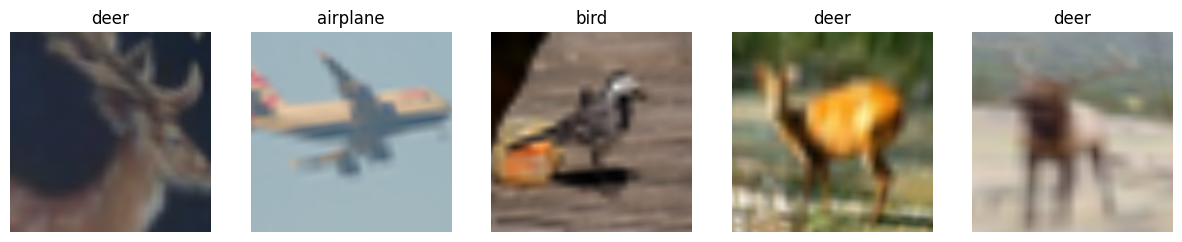

In [ ]:
dls.show_batch(nrows=1, ncols=5)

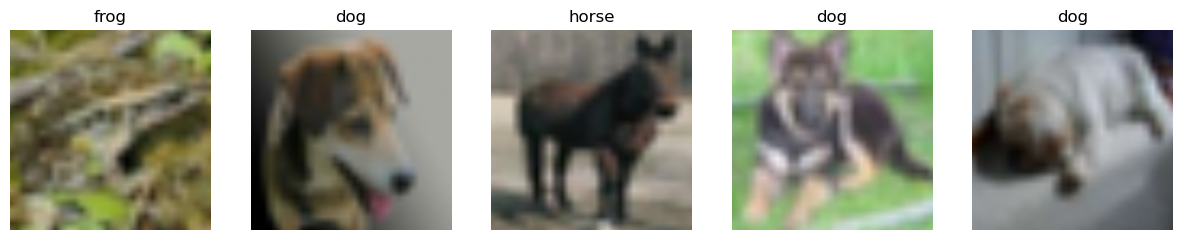

In [ ]:
dls.valid.show_batch(nrows=1, ncols=5)

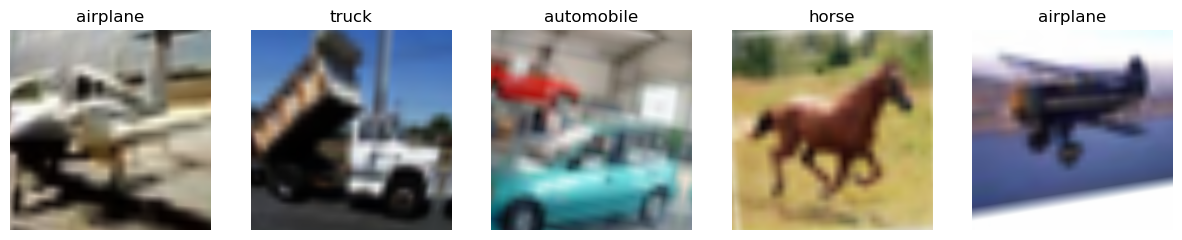

In [ ]:
dls.train.show_batch(nrows=1, ncols=5)

In [ ]:
cifar10.summary(path/"train")

# <Font color = 'pickle'>**Train Model**

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 60.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.661299,0.389270,0.131400,01:27


epoch,train_loss,valid_loss,error_rate,time
0,0.299662,0.199006,0.067100,01:40
1,0.242593,0.163142,0.053600,01:39
2,0.164573,0.138350,0.049300,01:37
3,0.089259,0.106710,0.036200,01:39
4,0.049325,0.101360,0.033700,01:41


## Model Interpretation

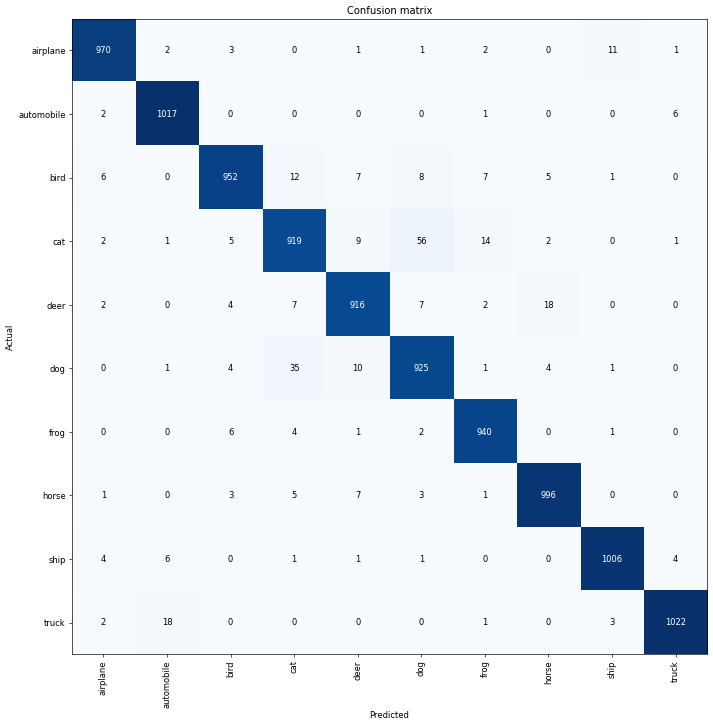

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('cat', 'dog', 56),
 ('dog', 'cat', 35),
 ('deer', 'horse', 18),
 ('truck', 'automobile', 18),
 ('cat', 'frog', 14),
 ('bird', 'cat', 12),
 ('airplane', 'ship', 11),
 ('dog', 'deer', 10),
 ('cat', 'deer', 9),
 ('bird', 'dog', 8),
 ('bird', 'deer', 7),
 ('bird', 'frog', 7),
 ('deer', 'cat', 7),
 ('deer', 'dog', 7),
 ('horse', 'deer', 7),
 ('automobile', 'truck', 6),
 ('bird', 'airplane', 6),
 ('frog', 'bird', 6),
 ('ship', 'automobile', 6),
 ('bird', 'horse', 5),
 ('cat', 'bird', 5),
 ('horse', 'cat', 5)]

## Improving Our Model

### The Learning Rate Finder

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)


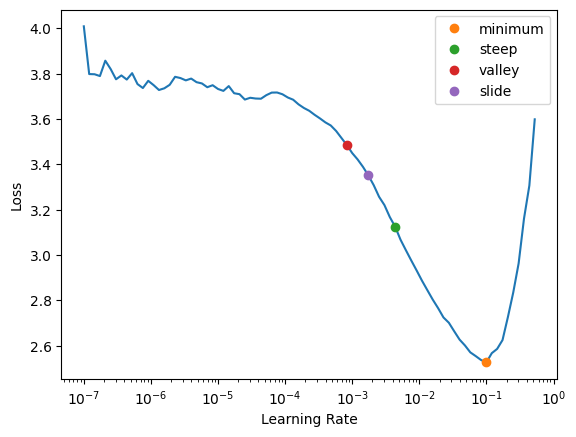

In [ ]:
lr = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [ ]:
print(lr.valley, lr.steep, lr.slide, lr.minimum)

0.0008317637839354575 0.004365158267319202 0.001737800776027143 0.010000000149011612


In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
# learn.fine_tune(5, base_lr=0.004)

epoch,train_loss,valid_loss,error_rate,time
0,0.543226,0.307619,0.104500,01:23


epoch,train_loss,valid_loss,error_rate,time
0,0.343411,0.231800,0.075400,01:36
1,0.296592,0.217843,0.073400,01:38
2,0.200622,0.158759,0.053100,01:39
3,0.092835,0.109649,0.035400,01:37
4,0.050666,0.103242,0.031200,01:37


### Unfreezing and Transfer Learning

In [ ]:
doc(learn.fine_tune)

In [ ]:
doc(learn.fit_one_cycle)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.freeze()
learn.fit_one_cycle(1, 0.004, pct_start=0.99)

epoch,train_loss,valid_loss,error_rate,time
0,0.447348,0.289051,0.099400,01:28


Then we'll unfreeze the model:

### Discriminative Learning Rates

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5, lr_max=slice(0.004/200, 0.004/2))

epoch,train_loss,valid_loss,error_rate,time
0,0.341526,0.267121,0.088200,01:41
1,0.289724,0.244952,0.077500,01:44
2,0.180417,0.141834,0.048900,01:39
3,0.092981,0.110133,0.038800,01:41
4,0.055168,0.099137,0.032800,01:39


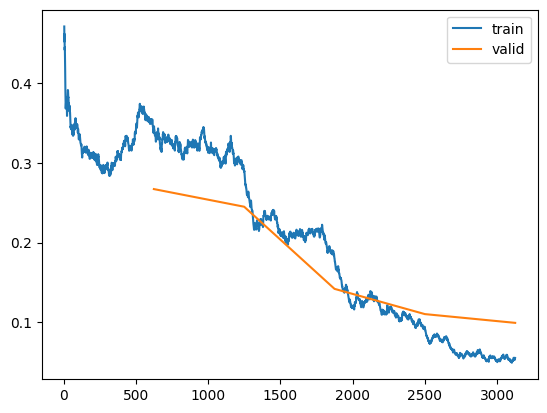

In [ ]:
learn.recorder.plot_loss()

### Test Set Performance

In [ ]:
test_dl = learn.dls.test_dl(get_image_files(path/"test"), with_labels = True)

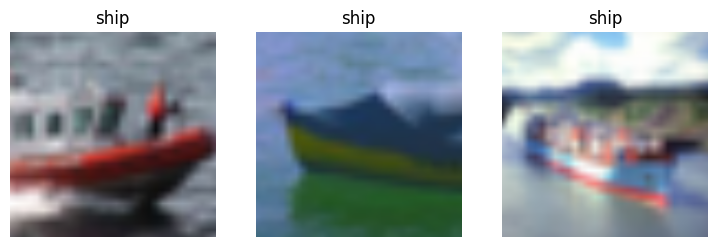

In [ ]:
test_dl.show_batch(max_n = 3)

In [ ]:
predictions = learn.get_preds(dl = test_dl, with_decoded=True)

In [ ]:
doc(learn.get_preds)

In [ ]:
predictions

(tensor([[1.7204e-06, 1.0634e-07, 3.7337e-07,  ..., 5.7884e-09, 1.0000e+00,
          1.8169e-08],
         [2.6192e-02, 3.4857e-05, 6.8485e-02,  ..., 3.7391e-06, 9.0511e-01,
          2.8564e-05],
         [2.5957e-05, 1.8250e-06, 8.6941e-08,  ..., 8.7669e-09, 9.9997e-01,
          6.4215e-07],
         ...,
         [7.7485e-07, 1.0275e-06, 1.5067e-05,  ..., 2.7621e-07, 7.2571e-07,
          1.2890e-07],
         [6.5689e-07, 5.0204e-08, 1.7684e-06,  ..., 3.4081e-07, 1.9947e-06,
          2.3658e-08],
         [1.0411e-06, 3.4954e-07, 1.5693e-06,  ..., 1.2400e-06, 1.3058e-06,
          1.7122e-07]]),
 tensor([8, 8, 8,  ..., 3, 3, 3]),
 tensor([8, 8, 8,  ..., 3, 3, 3]))

In [ ]:
preds, y, decoded = predictions

In [ ]:
decoded

tensor([8, 8, 8,  ..., 3, 3, 3])

In [ ]:
y

tensor([8, 8, 8,  ..., 3, 3, 3])

In [ ]:
acc = accuracy(preds, y)

In [ ]:
acc

TensorBase(0.9636)

### Test time Augumentation

In [ ]:
preds,targs = learn.tta(dl = test_dl)

In [ ]:
acc = accuracy(preds, targs)

In [ ]:
acc

TensorBase(0.9660)